# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [4]:
# Sua justificativa aqui
# O Teste é Unilateral à direita, pois a média da estrategia B é maior em relaçao a estrategia A.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [5]:
#Seu código aqui
media_amostra_a = np.mean(amostra_estrategia_A)
var_a = np.var(amostra_estrategia_A)
media_amostra_b = np.mean(amostra_estrategia_B)
var_b = np.var(amostra_estrategia_B)
print(f'Média da Estrategia A: {media_amostra_a}, Variância {var_a} ')
print(f'Média da Estrategia B: {media_amostra_b}, Variância {var_b} ')

Média da Estrategia A: 71.40559272313098, Variância 126.68018446943104 
Média da Estrategia B: 74.74868110507046, Variância 108.26062024217782 


**1**- Média da estratégia B é maior do que a estratégia A, isso sugere que as notas da estratégia B tem um desempenho superior. 
**2** - Variabilidade semelhante, indicando uma disperão semelhante, tornado amostras consistentes.
**3** - Como a diferença das médias é maior que o desvio padrão ha um bom indicio de não ser apenas um acaso.

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [6]:
#Seu código aqui
from scipy.stats import norm


# Dados

n = 50


# Estatística Z
z = (media_estrategia_B - media_estrategia_A) / ((var_b/n+var_a/n)**0.5)

# p-value (teste unilateral à direita)
p_value = 1 - norm.cdf(z)

print("Estatística Z:", z)
print("p-value:", p_value)

# Decisão
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: A Estratégia B tem média significativamente maior.")
else:
    print("Não rejeitamos H0: Não há evidência suficiente de que B seja melhor.")


Estatística Z: 2.306618551029468
p-value: 0.010538047219530666
Rejeitamos H0: A Estratégia B tem média significativamente maior.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

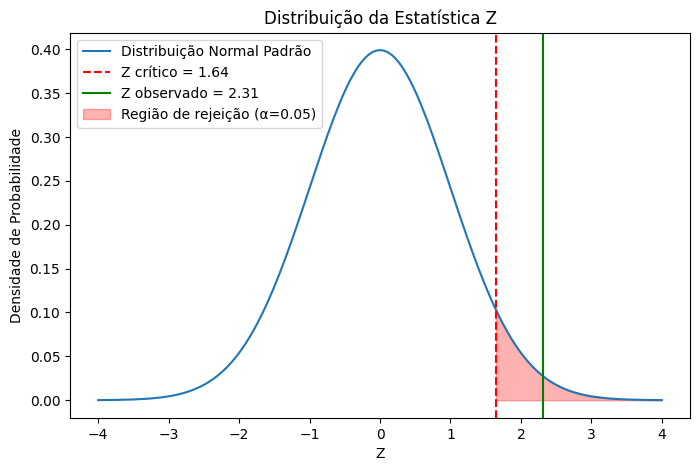

In [7]:
#Seu código aqui

x = np.linspace(-4, 4, 200)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(8,5))
plt.plot(x, y, label='Distribuição Normal Padrão')

# Região crítica (α = 0.05, unilateral direita)
z_critico = norm.ppf(0.95)  # ~1.645
plt.axvline(z_critico, color='red', linestyle='--', label=f'Z crítico = {z_critico:.2f}')

# Estatística Z observada
plt.axvline(z, color='green', linestyle='-', label=f'Z observado = {z:.2f}')

# Preencher região de rejeição
x_fill = np.linspace(z_critico, 4, 100)
plt.fill_between(x_fill, norm.pdf(x_fill), color='red', alpha=0.3, label='Região de rejeição (α=0.05)')

plt.title("Distribuição da Estatística Z")
plt.xlabel("Z")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.show()

Aqui Percebemos que o "Z Observado" está mais a direita do "Z Crítico" Rejeitando a hípotese nula, mostrando que a estratégia B é superior e que, não se trata de uma coincidência. 
